# EDA with methods on Unit4 data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

## get data

In [2]:
df=pd.read_csv('unit4.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [4]:
df.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90569.000000,70386.000000,90569.000000,90569.00000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,80916.000000,90569.000000
mean,2724.442789,3.878257,1056.391304,1127.42116,4.213473,3.865462,339.373240,386.231083,386.694068,429.977917,15682.038600,46.797204,18.370701,5.343407,12.837351,9701.640606,9.501353,8.114378,13.428585
std,2136.453823,1.855265,936.383991,942.16266,2.302380,2.239738,162.390371,173.082626,160.945113,171.332133,8508.870754,22.944967,8.582096,1.207126,4.499933,5.679884,8.495065,8.310877,10.796349
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.00000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.00000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.00000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.00000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


## Deal with nulls df

In [5]:
nulls_df=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)

In [6]:
nulls_df

,0
STATE,0.00
PVASTATE,0.00
DOB,0.00
MDMAUD,0.00
RECP3,0.00
GENDER,0.00
DOMAIN,0.00
INCOME,22.28
HOMEOWNR,0.00
HV1,0.00


## Nulls handling

In [7]:
# income and timelag fetures
# EDA to understand those columns
# relationship to the label (avg_gift)
# is the gap same in both cases

In [8]:
df.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,...,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,...,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,...,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,...,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,...,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [9]:
df['MDMAUD'].value_counts()

XXXX    90290
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

JUST AN IDEA TO SHOW THE BLANKS:
- REGEX /s -any white space
- ^$ start and end of string
- apply this to find any blanks and replace with NaN

In [10]:
df1= df.replace(r'^\s$',np.NaN, regex=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  1385 non-null   object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     1833 non-null   object 
 5   GENDER    87774 non-null  object 
 6   DOMAIN    88393 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  69518 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  9846 non-null   object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

## Imputing the income value (if its useful)

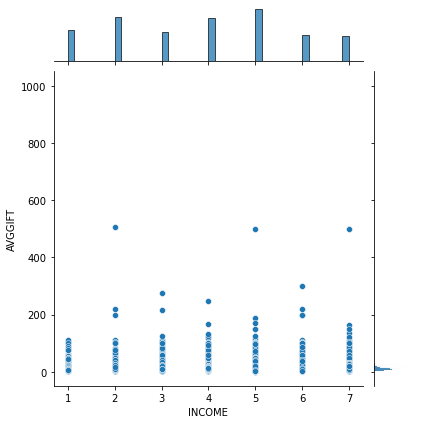

In [12]:
sns.jointplot(x=df['INCOME'], y=df['AVGGIFT']);

In [13]:
# as the chart shows, no clear evidence of a relationship between independent and dependent variable

In [14]:
df['INCOME'].value_counts()

5.0    14639
2.0    12482
4.0    12092
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: INCOME, dtype: int64

In [15]:
np.mean(df['INCOME'])

3.8782570397522234

- impute (fill the gaps) options: median/mean - a lot of bias, most common value (mode)
    - predict the value using a model (each model is wrong but some are useful) - interpolation

In [16]:
# visualize
# try something
# visualize
# try something else
# visualize
# pick the best option / least worst option

In [17]:
new_income_1=df['INCOME'][0:40].interpolate(method='linear')

In [18]:
new_income_1

0          NaN
1     6.000000
2     3.000000
3     1.000000
4     3.000000
5     3.500000
6     4.000000
7     2.000000
8     3.000000
9     2.500000
10    2.000000
11    1.000000
12    4.000000
13    4.000000
14    4.000000
15    1.000000
16    1.000000
17    7.000000
18    4.000000
19    3.000000
20    2.000000
21    3.666667
22    5.333333
23    7.000000
24    7.000000
25    7.000000
26    7.000000
27    7.000000
28    4.000000
29    1.000000
30    4.000000
31    4.000000
32    4.000000
33    4.000000
34    4.000000
35    5.000000
36    6.000000
37    3.000000
38    3.000000
39    3.000000
Name: INCOME, dtype: float64

In [19]:
points_2=df['INCOME'].fillna(np.mean(df['INCOME']))

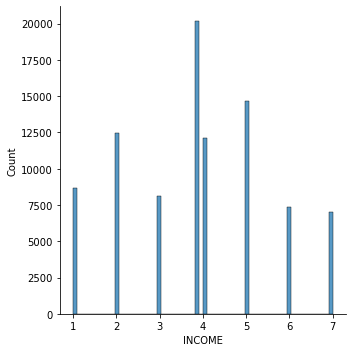

In [20]:
sns.displot(points_2)

In [21]:
df['STATE'].value_counts()

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

In [22]:
values=pd.DataFrame(df['STATE'].value_counts())

In [23]:
values

,STATE
CA,16284
FL,7959
TX,7166
IL,6124
MI,5375
NC,3956
WA,3383
GA,3261
IN,2855
WI,2656


In [24]:
group_states=values[values['STATE']<1000]

In [25]:
group_states

,STATE
AR,969
MS,948
NV,923
NM,824
NE,715
UT,546
ID,504
MT,498
HI,423
SD,278


In [26]:
group_states_df=group_states.reset_index()

In [27]:
group_states_df

,index,STATE
0,AR,969
1,MS,948
2,NV,923
3,NM,824
4,NE,715
5,UT,546
6,ID,504
7,MT,498
8,HI,423
9,SD,278


In [28]:
group_states_df.columns=['nameofstate','count']

In [29]:
group_states_df

,nameofstate,count
0,AR,969
1,MS,948
2,NV,923
3,NM,824
4,NE,715
5,UT,546
6,ID,504
7,MT,498
8,HI,423
9,SD,278


In [30]:
def groputhestate(x):
    if x in group_states_df['nameofstate']:
        return 'other'
    else:
        return x

In [31]:
df['STATE']=list(map(groputhestate,df['STATE']))

In [32]:
df['STATE'].value_counts()

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

## VIF - Variance Inflation Factor - Multicollenearity for features

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [36]:
df=df.dropna() #quick method to remove nulls

In [37]:
df_cat=df.select_dtypes(include=object)

In [38]:
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [39]:
df_cat.head(1)

,STATE_AK,STATE_AL,STATE_AP,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DE,STATE_FL,...,RFA_2_L2F,RFA_2_L2G,RFA_2_L3D,RFA_2_L3E,RFA_2_L3F,RFA_2_L3G,RFA_2_L4D,RFA_2_L4E,RFA_2_L4F,RFA_2_L4G
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
df_num=df.select_dtypes(include=np.number)

In [41]:
df_full=pd.concat([df_cat,df_num],axis=1)

In [42]:
vif={}
df=add_constant(df_full)

In [43]:
df_full.shape

(63150, 135)

In [44]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63150 entries, 1 to 90568
Columns: 135 entries, STATE_AK to AVGGIFT
dtypes: float64(3), int64(16), uint8(116)
memory usage: 16.6 MB


In [46]:
for i in np.arange(df_full.shape[1]):
    column_name=df_full.columns[i]
    value=variance_inflation_factor(np.array(df_full),i)
    vif[column_name]=value

In [47]:
sorted_vif = dict(sorted(vif.items(), key=lambda item: item[1]))

In [48]:
sorted_vif

{'MDMAUD_C2LM': 1.0240655968670984,
 'MDMAUD_C5MM': 1.0243982173901802,
 'MDMAUD_C1MM': 1.0246595401228027,
 'MDMAUD_I5MM': 1.0266626288010767,
 'MDMAUD_C5CM': 1.0269227925048539,
 'MDMAUD_C5TM': 1.0384473701834576,
 'MDMAUD_I2MM': 1.039699839687477,
 'MDMAUD_I1LM': 1.0491638670323578,
 'PVASTATE_E': 1.0615385487841715,
 'MDMAUD_I5CM': 1.0618220015531297,
 'MDMAUD_D5CM': 1.0722921480850844,
 'MDMAUD_D2MM': 1.0727832643113073,
 'MDMAUD_C2MM': 1.0761996640915292,
 'MDMAUD_D5TM': 1.0791355895209556,
 'MDMAUD_D5MM': 1.1192961042354685,
 'MDMAUD_I2CM': 1.121428033780104,
 'MDMAUD_L1MM': 1.1299968842332804,
 'MDMAUD_L1LM': 1.1422716430324318,
 'MDMAUD_C1LM': 1.1646456859117496,
 'VETERANS_Y': 1.184021789031491,
 'STATE_WV': 1.2232419638938439,
 'STATE_DE': 1.2240417332598246,
 'RECP3_X': 1.2378419426125433,
 'RFA_2_L4G': 1.2453075554408655,
 'PVASTATE_P': 1.326728580460567,
 'MDMAUD_D1CM': 1.3300662915392347,
 'STATE_VT': 1.3350019176290222,
 'STATE_RI': 1.3353784168877492,
 'MDMAUD_L2CM': 1

In [49]:
type(vif)

dict

## feature extraction

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63150 entries, 1 to 90568
Columns: 136 entries, const to AVGGIFT
dtypes: float64(4), int64(16), uint8(116)
memory usage: 17.1 MB


In [51]:
list(df.columns)

['const',
 'STATE_AK',
 'STATE_AL',
 'STATE_AP',
 'STATE_AR',
 'STATE_AZ',
 'STATE_CA',
 'STATE_CO',
 'STATE_CT',
 'STATE_DE',
 'STATE_FL',
 'STATE_GA',
 'STATE_HI',
 'STATE_IA',
 'STATE_ID',
 'STATE_IL',
 'STATE_IN',
 'STATE_KS',
 'STATE_KY',
 'STATE_LA',
 'STATE_MA',
 'STATE_MD',
 'STATE_ME',
 'STATE_MI',
 'STATE_MN',
 'STATE_MO',
 'STATE_MS',
 'STATE_MT',
 'STATE_NC',
 'STATE_ND',
 'STATE_NE',
 'STATE_NH',
 'STATE_NJ',
 'STATE_NM',
 'STATE_NV',
 'STATE_NY',
 'STATE_OH',
 'STATE_OK',
 'STATE_OR',
 'STATE_PA',
 'STATE_RI',
 'STATE_SC',
 'STATE_SD',
 'STATE_TN',
 'STATE_TX',
 'STATE_UT',
 'STATE_VA',
 'STATE_VT',
 'STATE_WA',
 'STATE_WI',
 'STATE_WV',
 'STATE_WY',
 'PVASTATE_E',
 'PVASTATE_P',
 'MDMAUD_C1LM',
 'MDMAUD_C1MM',
 'MDMAUD_C2CM',
 'MDMAUD_C2LM',
 'MDMAUD_C2MM',
 'MDMAUD_C5CM',
 'MDMAUD_C5MM',
 'MDMAUD_C5TM',
 'MDMAUD_D1CM',
 'MDMAUD_D2CM',
 'MDMAUD_D2MM',
 'MDMAUD_D5CM',
 'MDMAUD_D5MM',
 'MDMAUD_D5TM',
 'MDMAUD_I1CM',
 'MDMAUD_I1LM',
 'MDMAUD_I2CM',
 'MDMAUD_I2MM',
 'MDMAUD_

In [56]:
df['DOB'].unique()

array([5202,    0, 2801, 2001, 6001, 2301, 2603, 2709, 5401, 5201, 3601,
       4307, 1401, 4809, 2601, 2904, 1002, 1311, 6801, 5310, 4611,  908,
       3001, 1411, 5210, 3703, 5801, 5001, 6201, 5701, 1805, 1801, 4403,
       2512, 3605, 5101, 4401, 6501, 3501, 3812, 2101, 1101, 4707,  809,
       1408, 2909, 3901, 2006, 1206, 4612, 3701, 3201, 2108, 2901, 7201,
       2201, 3607, 2701, 2503, 1201, 5901, 2501, 1507, 2207, 6410, 1502,
        512, 2408, 3004, 5605, 1701, 4801, 4201, 5710, 1902, 6101, 3708,
       3101, 3006, 1003, 5601, 5301, 5312, 5812, 2401, 6401, 4001, 4901,
       3401, 1305, 1911, 1604, 3309, 4501, 3711, 2303, 2710, 2308, 1509,
       1912, 4903, 3102, 6310, 3105, 4709, 6107, 5208, 3312, 1510, 1001,
       4211, 1309, 4610,  401, 2910, 4602, 4301, 1105, 4212, 2310, 3912,
       3410, 2411, 4312, 3905,  506, 3301, 1610, 4101, 1904, 1504, 2809,
       1503, 4406, 1108, 4601, 1601, 2506, 3005,  812, 1506, 4605, 5502,
       5905, 4812, 2607, 1106, 2009,  101, 4909,  8

In [78]:
def get_age (x):
    if len(str(x)) not in (3,4):
        return 1
    else:
        if x%100 < 13: 
            return 1997 - int('19'+str(x)[:2])
    

In [79]:
get_age(3601)

61

In [80]:
df['age']=list(map(get_age,df['DOB']))

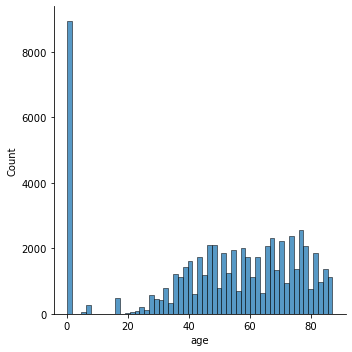

In [81]:
sns.displot(df['age'])

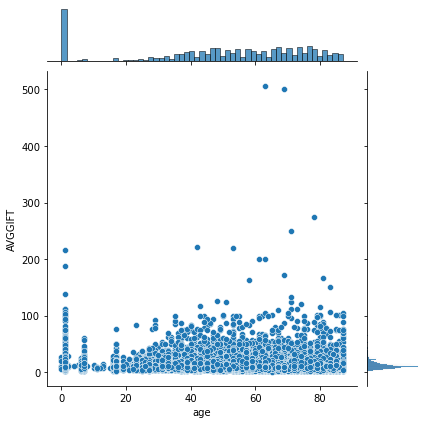

In [82]:
sns.jointplot(x=df['age'], y=df['AVGGIFT'])

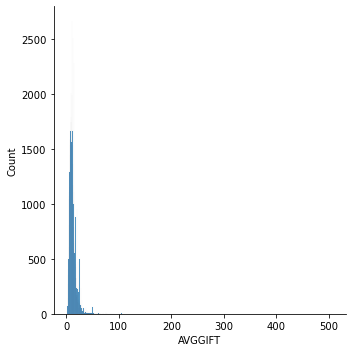

In [83]:
sns.displot(df['AVGGIFT'])